## Process and Visualize IWG data from Arctic Heat (2016)

Arctic Heat IWG files are obtained during aircraft flights.  Using python and a few standard data analysis and visualization packages, we can take a few quick looks into the data.

**Note** GMT-Python is in heavy development and may not be available unless you are on a mac or linux machine.  Alternatives are Cartopy or outputing your data into your favorite GIS software.

For more information on the analysis, contact: Shaun.Bell@noaa.gov

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import cmocean

import pandas as pd
import numpy as np

import os

### Data Ingestion and data summary/statistics

A few lines to list and read the .iwg files into a dictionary of pandas dataframes.

The original .iwg files have headerlines everyso often through the file.  I usually clean these up by removing all of the lines and adding one iteration of headers at the top of the file and then call these files ".clean"

In [39]:
source_dir = '/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/'

source_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(source_dir)) for f in fn if 'dat' in f]


In [40]:
dfs = {}
for i,filename in enumerate(source_file):
    try:
        dfs.update({filename:pd.read_csv(filename,delimiter=',',
                                         parse_dates=['TIME'],index_col='TIME')})
        print(filename)
    except ValueError:
        print("{} failed to load".format(filename))
        continue

/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/AH20160911_data/20160911_180649_IWG.dat
/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/AH20160910_data/iwgah20160910/20160910_221044_IWG.dat
/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/AH20160910_data/iwgah20160910/20160910_190740_IWG.dat
/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/AH20160910_data/iwgah20160910/20160910_200801_IWG.dat
/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/AH20160915_data/20160915_190745_IWG.dat
/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/AH20160914_data/20160914_190742_IWG.dat
/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/orig/AH_BT_data.zip failed to load
/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/orig/20160912_190705_IWG.dat failed to load
/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/orig/2016

In [41]:
for file in dfs.keys():
    print("Summary for file:{}".format(file))
    print(dfs[file].describe())

Summary for file:/Users/bell/ecoraid/2016/Additional_FieldData/ArcticHeat/sep_aircraft/AH20160911_data/20160911_180649_IWG.dat
                LAT           LON        ALTGPS  GPS_GEOIDHT       ALTPAFT  \
count  16832.000000  16832.000000  16832.000000          0.0  16832.000000   
mean      71.495254   -162.017543    152.792122          NaN    287.123337   
std        0.578547      3.237776     34.171992          NaN    113.589678   
min       70.594131   -167.909576     13.000000          NaN   -220.000000   
25%       71.044861   -164.697369    151.000000          NaN    280.000000   
50%       71.285919   -161.888977    154.000000          NaN    290.000000   
75%       72.004769   -159.534199    158.000000          NaN    300.000000   
max       72.514511   -156.681534    275.000000          NaN    700.000000   

            ALTRAFT            GS           TAS           IAS          MACH  \
count  16832.000000  16832.000000  16832.000000  16832.000000  16832.000000   
mean     468

               LAT          LON       ALTGPS  GPS_GEOIDHT      ALTPAFT  \
count  9462.000000  9462.000000  9462.000000          0.0  9462.000000   
mean     72.721035  -158.229683   183.929296          NaN   479.655464   
std       0.468698     2.207111    97.093878          NaN   339.044567   
min      71.579262  -162.056122   154.000000          NaN     0.000000   
25%      72.401955  -160.385956   161.000000          NaN   400.000000   
50%      72.718819  -157.813835   164.000000          NaN   420.000000   
75%      73.207767  -156.094753   169.000000          NaN   420.000000   
max      73.322083  -155.216797   910.000000          NaN  3020.000000   

           ALTRAFT           GS          TAS          IAS         MACH  \
count  9462.000000  9462.000000  9462.000000  9462.000000  9462.000000   
mean    553.690023    61.852643    65.235412   125.375608     0.191699   
std     294.698132     4.509155     1.341001     4.245518     0.006987   
min       0.000000    47.180000    58

                LAT           LON        ALTGPS  GPS_GEOIDHT       ALTPAFT  \
count  15207.000000  15207.000000  15207.000000          0.0  15207.000000   
mean      68.916152   -164.539061   1226.781219          NaN   4305.759847   
std        2.994981      6.786734   1294.755739          NaN   4324.655101   
min        0.000000   -168.755859      0.000000          NaN    -40.000000   
25%       67.003940   -167.633934    149.000000          NaN    820.000000   
50%       69.054939   -165.662231    540.000000          NaN   1810.000000   
75%       70.838165   -162.759735   3056.000000          NaN  10450.000000   
max       71.303909      0.000000   3084.000000          NaN  10470.000000   

            ALTRAFT            GS           TAS           IAS          MACH  \
count  15207.000000  15207.000000  15207.000000  15207.000000  15207.000000   
mean     431.308476     70.139969     65.845730    116.181430      0.190334   
std      585.998907     18.081904     11.916901     25.04747

               LAT          LON       ALTGPS  GPS_GEOIDHT  ALTPAFT  \
count  7627.000000  7627.000000  7627.000000          0.0   7627.0   
mean     71.035183  -151.838300  1238.508326          NaN      0.0   
std       0.395374     3.056923  1051.391979          NaN      0.0   
min      70.184425  -156.823090    12.000000          NaN      0.0   
25%      70.779358  -154.878021   186.000000          NaN      0.0   
50%      71.167259  -150.288101  1040.000000          NaN      0.0   
75%      71.331879  -149.194626  2128.000000          NaN      0.0   
max      71.503967  -148.348358  2760.000000          NaN      0.0   

           ALTRAFT           GS          TAS     IAS    MACH     ...       \
count  7627.000000  7627.000000  7627.000000  7627.0  7627.0     ...        
mean    -19.997378    66.296564    63.357628     0.0     0.0     ...        
std       0.229009    27.696545    18.244683     0.0     0.0     ...        
min     -20.000000     0.000000     6.820000     0.0     0.0 

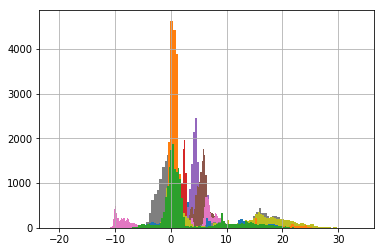

In [42]:
for file in dfs.keys():
    dfs[file]['SST'].hist(bins=100)

### Geolocated Plots of SST/Flight Altitude

After having imported and glanced at the data and statistics, lets plot the SST as a function of flight path

In [43]:
import gmt

In [44]:
fig = gmt.Figure()

fig.coast(region=[-170, -155, 66, 73], projection='B-160/60/55/60/6i', land='black', water='lightgrey',
          frame=True,U=True) 

In [45]:
#choose temp boundaries
upper_limit = 5
lower_limit = -2

for file in dfs.keys():
    dfmiss = dfs[file].copy()
    dfmiss['SST'].loc[(dfs[file]['SST'] > upper_limit ) | (dfs[file]['SST'] <lower_limit)] = np.nan
    # normalize data for colormap
    dfnorm = dfmiss['SST'].apply(lambda x: (x - (lower_limit)) / (upper_limit - (lower_limit)))
    fig.plot(x=dfs[file].LON.values, y=dfs[file].LAT.values, color=256*dfnorm, cmap='thermal', style='c0.1c')


/Users/bell/anaconda2/envs/gmt-python/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


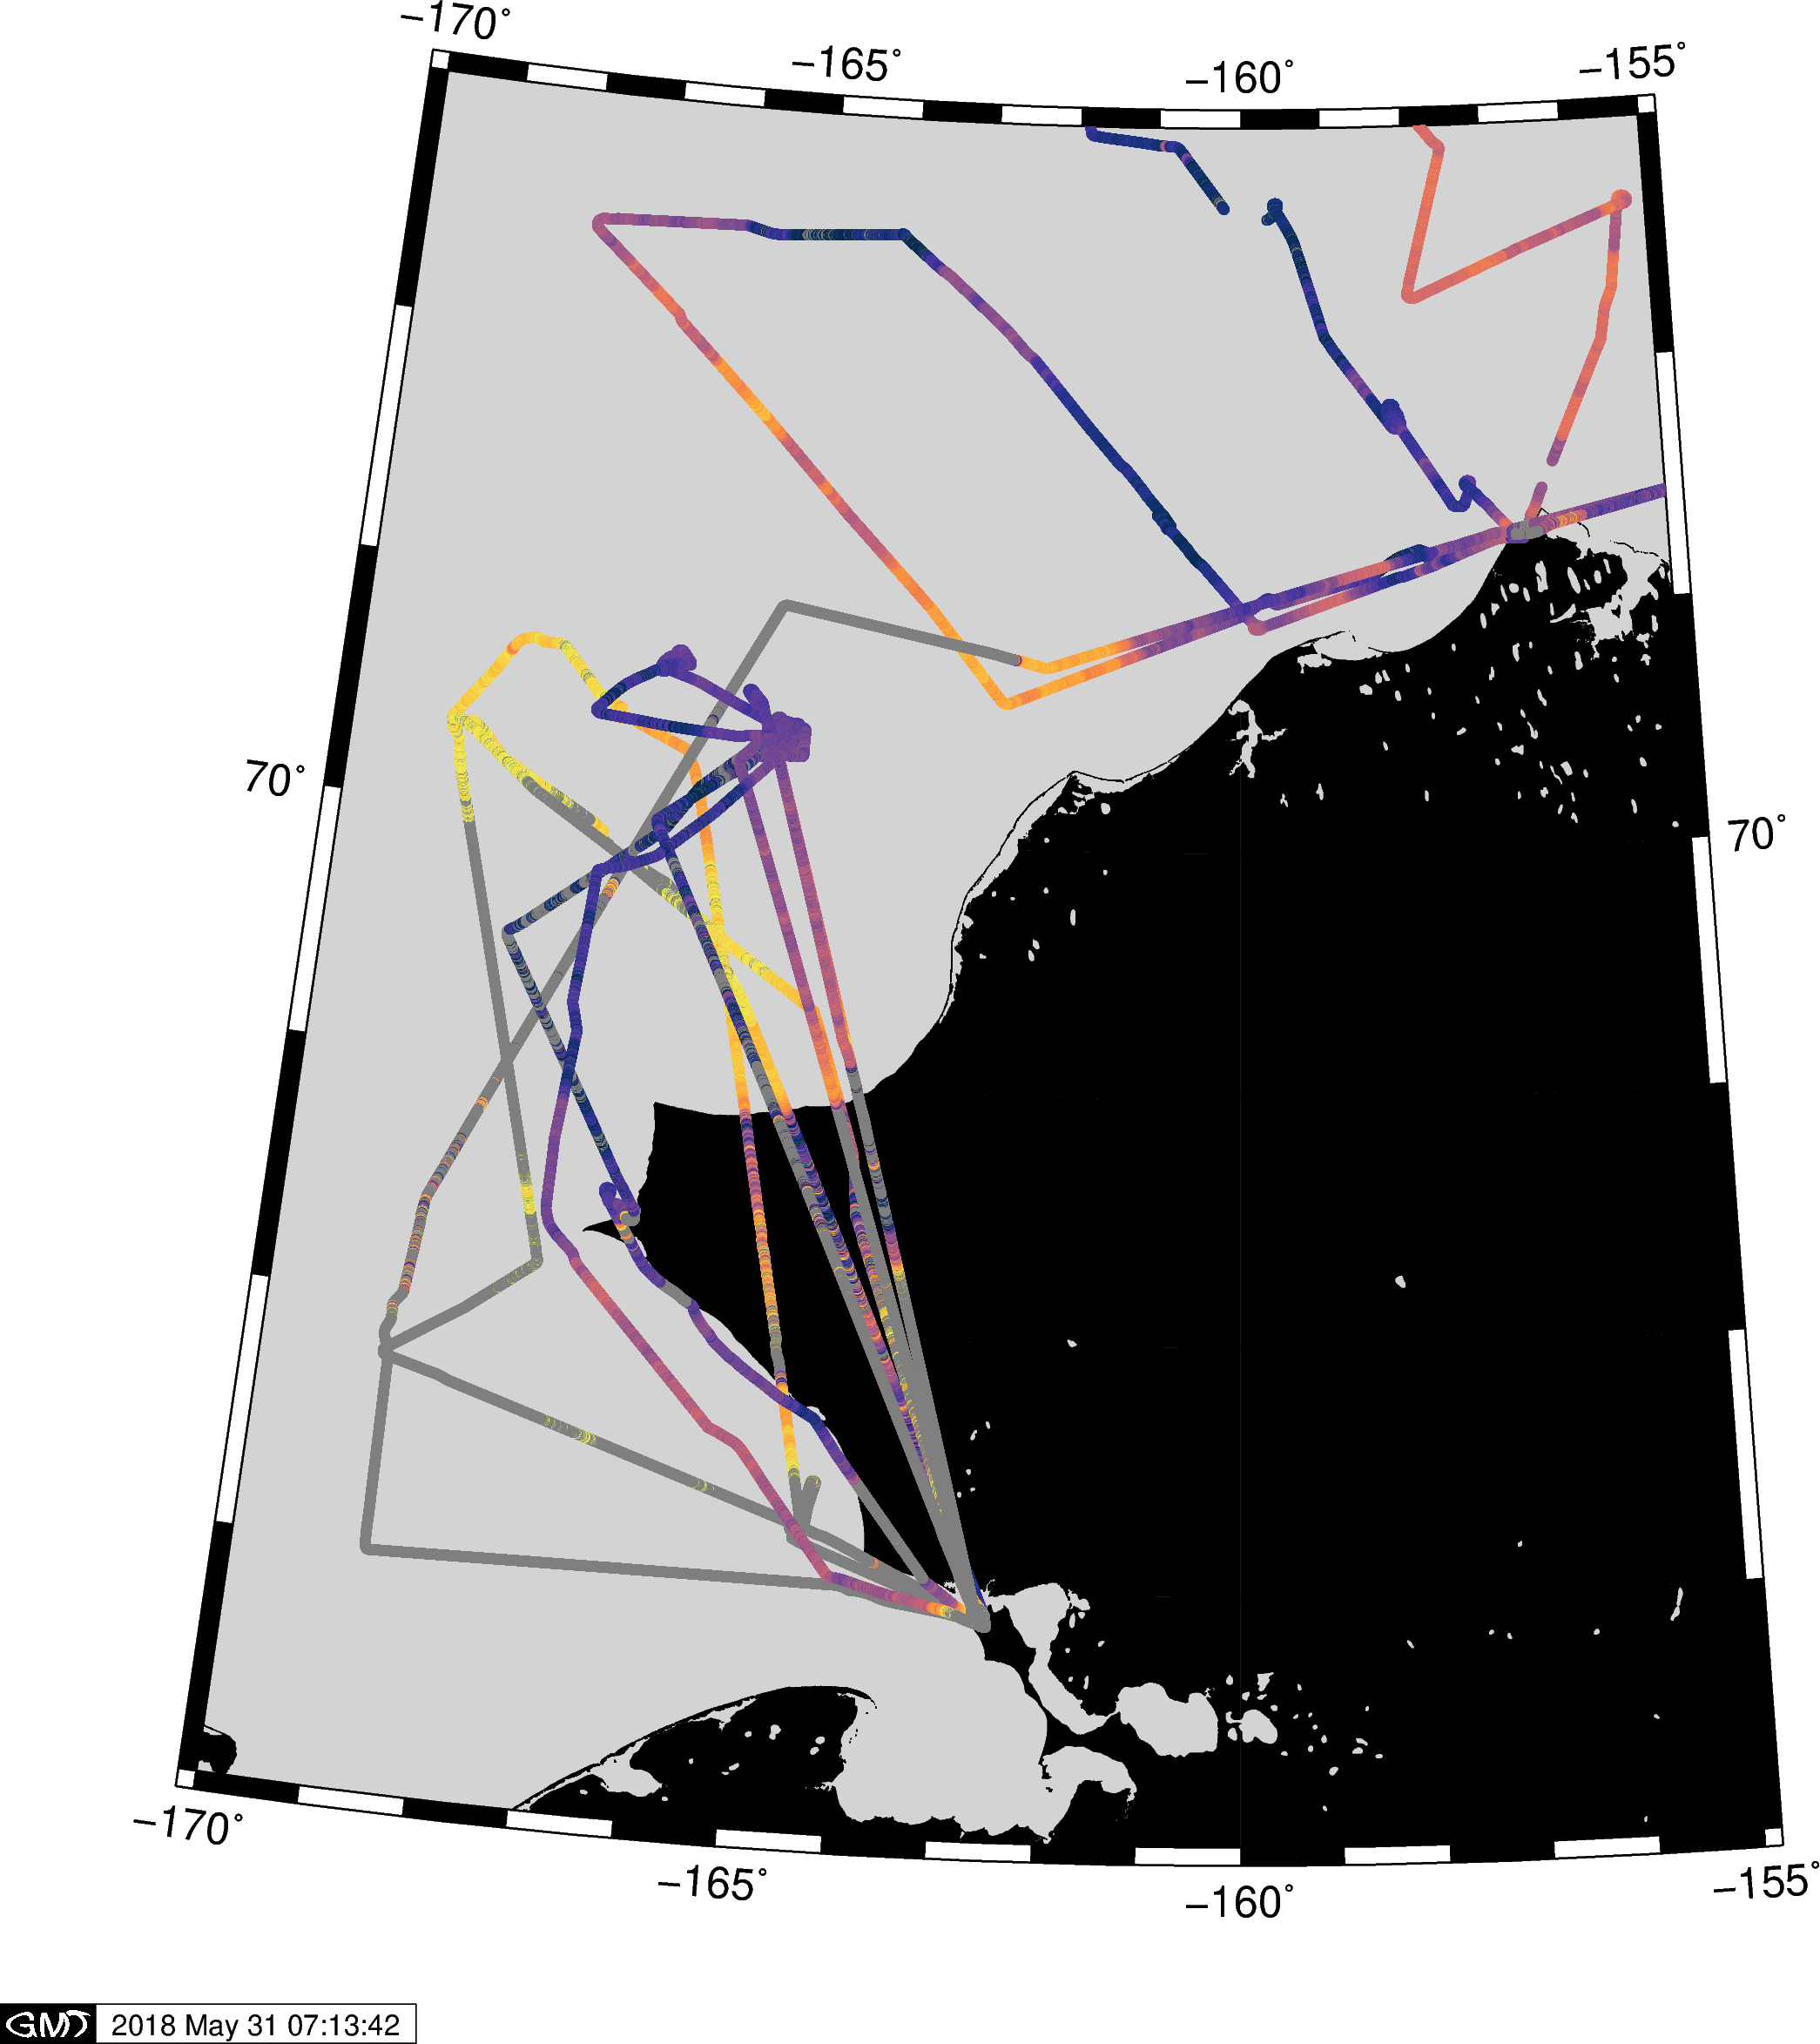

In [46]:
fig.show()

In [47]:
fig = gmt.Figure()

fig.coast(region=[-170, -155, 66, 73], projection='B-160/60/55/60/6i', land='black', water='lightgrey',
          frame=True,U=True) 

/Users/bell/anaconda2/envs/gmt-python/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


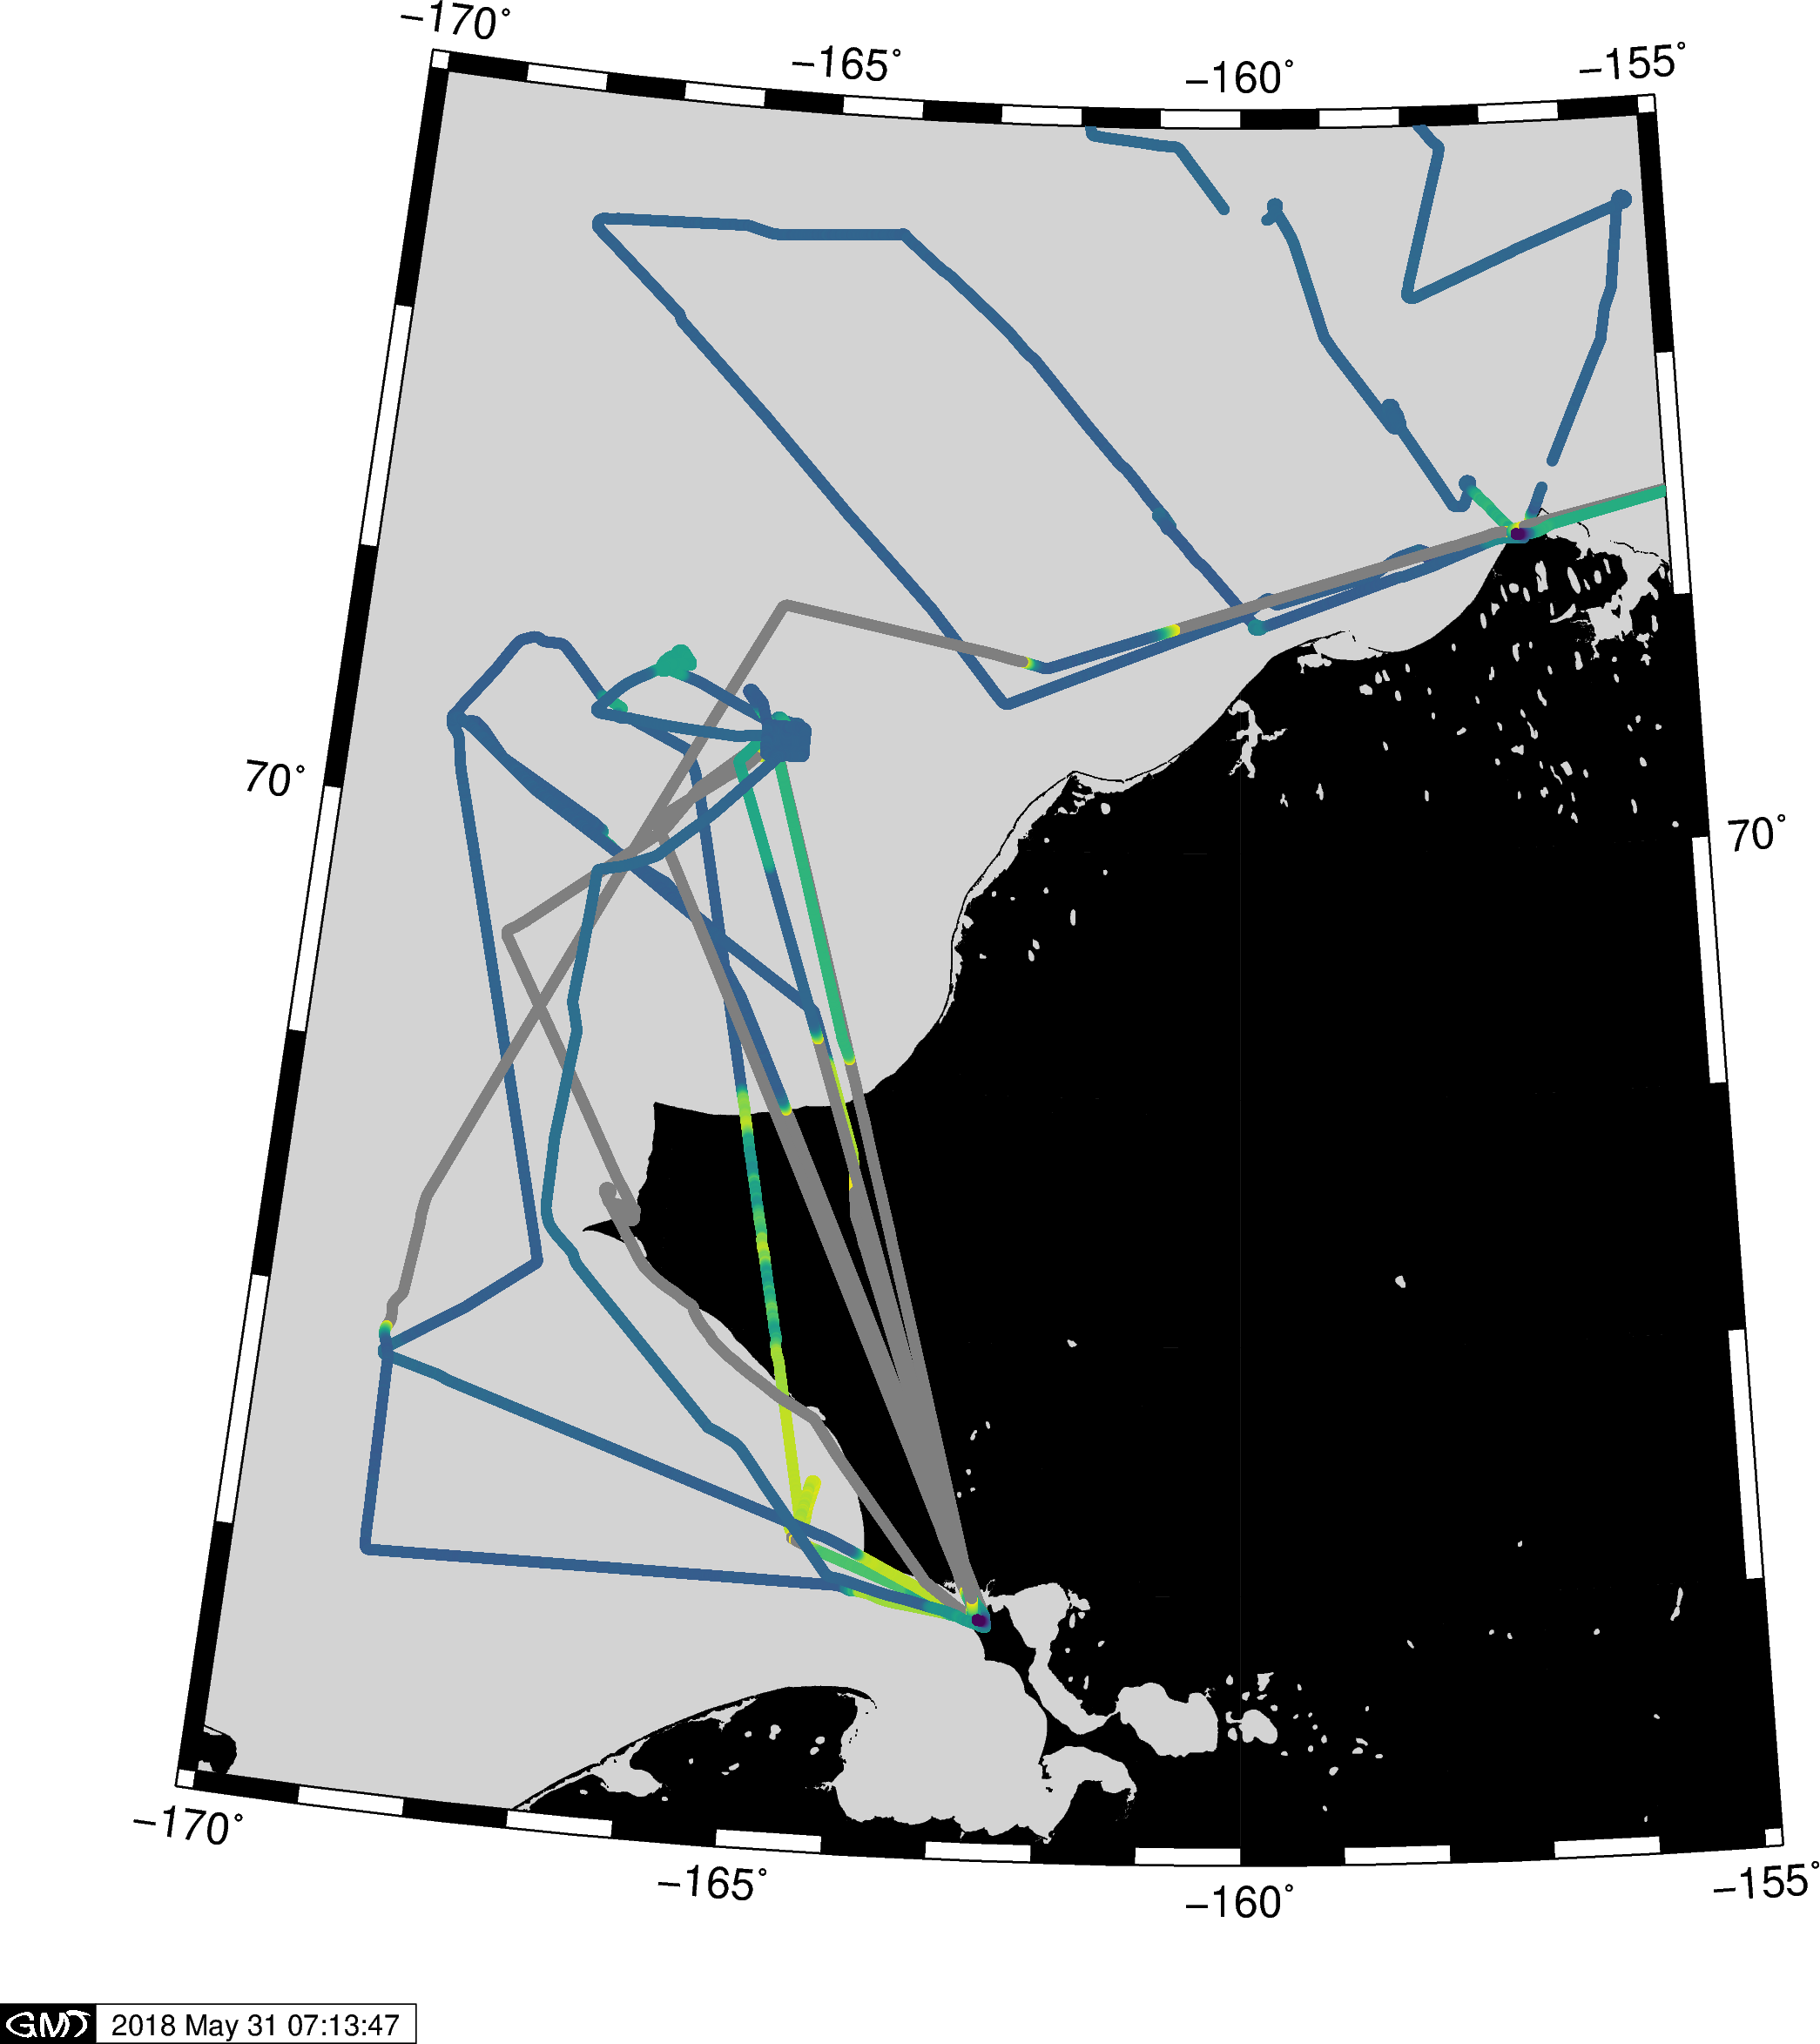

In [48]:
#choose altitude boundaries
upper_alt = 500 #ft
#lower is 0ft

for file in dfs.keys():
    dfmiss = dfs[file].copy()
    dfmiss['ALTGPS'].loc[(dfs[file]['ALTGPS'] > upper_alt ) | (dfs[file]['ALTGPS'] <lower_limit)] = np.nan
    # normalize data for colormap
    dfnorm = dfmiss['ALTGPS'].apply(lambda x: (x - (0)) / (upper_alt - (0)))
    #if a cmocean colormap is used like thermal - then you need to add it to your gmt-python env
    fig.plot(x=dfs[file].LON.values, y=dfs[file].LAT.values, color=dfnorm, cmap='viridis', style='c0.1c')

fig.show()

areas greyed out above are above 500ft.  darker blue regions are lower while lighter green regions are higher

### Plotting Time vs Altitude color coded by SST

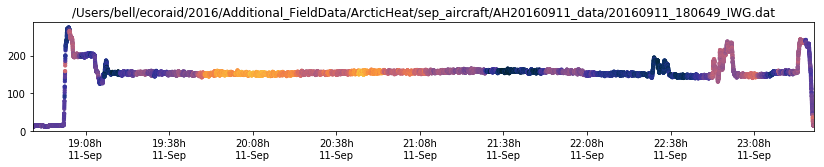

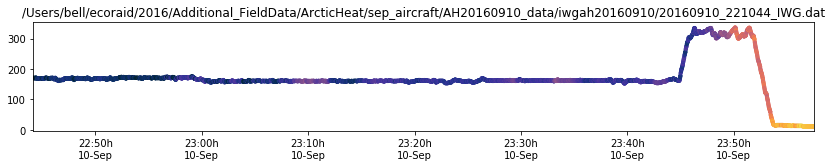

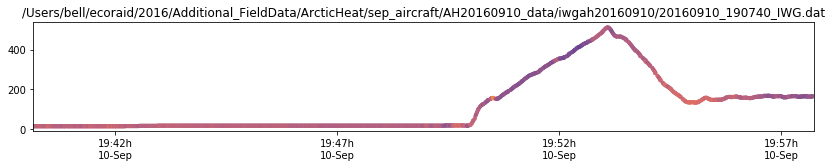

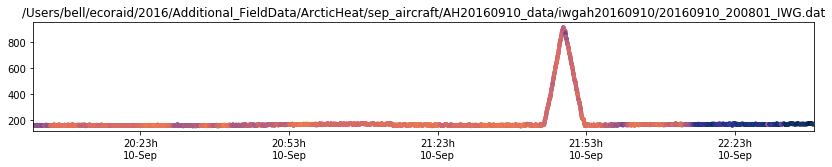

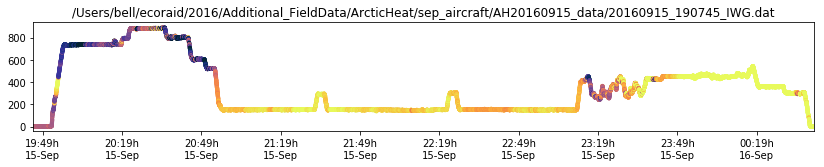

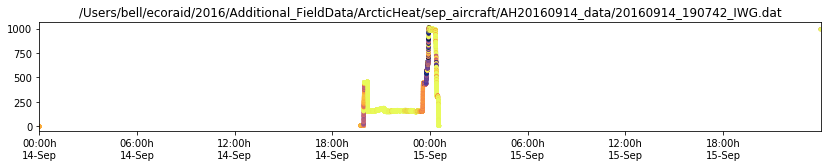

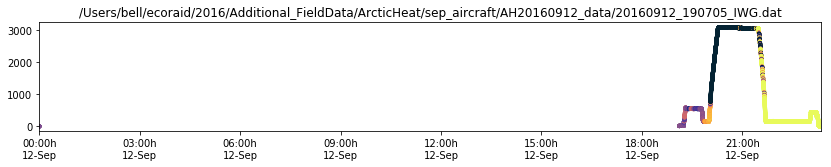

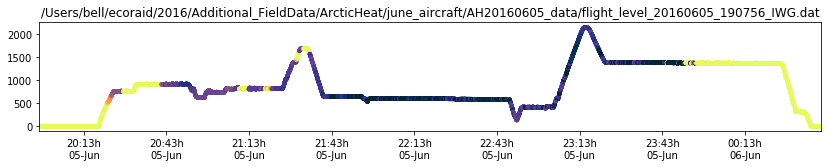

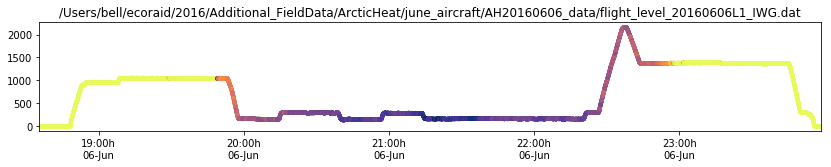

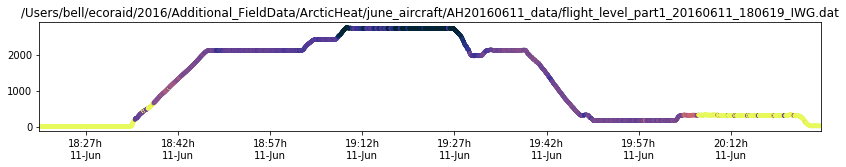

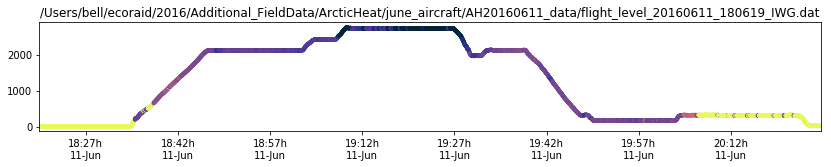

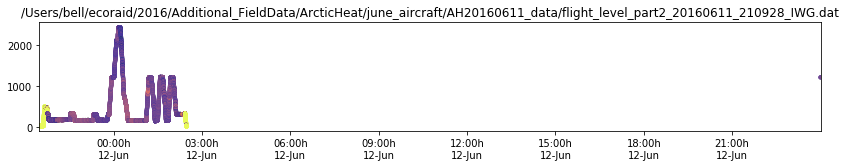

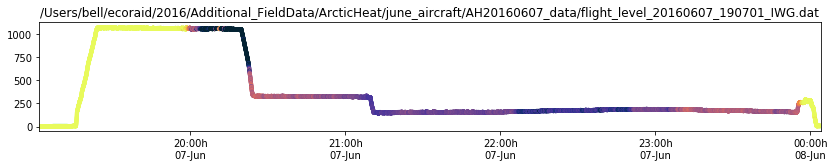

In [49]:
for file in dfs.keys():
    fig = plt.figure(figsize=(14, 2))
    ax1 = fig.add_subplot(111)
    plt.scatter(dfs[file].index,dfs[file]['ALTGPS'],
                s=10,c=dfs[file]['SST'],cmap=cmocean.cm.thermal,
                vmin=lower_limit,vmax=upper_limit)
    ax1.set_xlim(dfs[file].index.min(),dfs[file].index.max())
    xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
    ax1.xaxis.set_major_formatter(xfmt)
    plt.title(file)

### Color Bar Creation

Creating a consistent color bar for the thermal plots.  Maptlotlib can do this inherently but the GMT-Python package

In [50]:
def colorbar(cmap=cmocean.cm.thermal,label=''):

    '''
    ====================
    Customized colorbars
    ====================

    This example shows how to build colorbars without an attached mappable.
    '''

    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import cmocean

    # Make a figure and axes with dimensions as desired.
    fig = plt.figure(figsize=(8, 3))
    ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    cmap = cmap
    norm = mpl.colors.Normalize(vmin=lower_limit, vmax=upper_limit)

    # ColorbarBase derives from ScalarMappable and puts a colorbar
    # in a specified axes, so it has everything needed for a
    # standalone colorbar.  There are many more kwargs, but the
    # following gives a basic continuous colorbar with ticks
    # and labels.
    cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')
    cb1.set_label(label)

    # The second example illustrates the use of a ListedColormap, a
    # BoundaryNorm, and extended ends to show the "over" and "under"
    # value colors.
    cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
    cmap.set_over('0.25')
    cmap.set_under('0.75')

    plt.show()

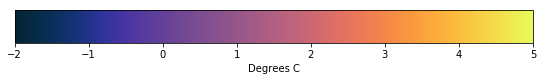

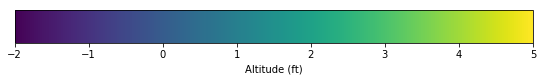

In [51]:
colorbar(cmocean.cm.thermal,'Degrees C')
colorbar('viridis','Altitude (ft)')